# Classifying which Veterans enroll in the VA
---

This is the biggest question.  If we can identify traits based on which veterans enroll and which do not could have impact on getting vets the help that they need.

In [1]:
# import libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVR, LinearSVR, SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.discrete.discrete_model import Logit
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# Read in dataset
vet_1 = pd.read_csv("./working_data/vets_1yr_clean.csv")

'''Additional viewing options'''
# This code sets the notebook to display maximum columns.  Uncomment it to see trunacted view
pd.set_option('display.max_columns', len(vet_1))  

# This resets the view to a truncated output
#pd.reset_option('display.max_rows')

vet_1.head()

,REGION,DIVISION,CIT,COW,DEAR,DEYE,WKW,DOUT,DPHY,DRAT,DRATX,DREM,ENG,MLPK,HINS1,HINS2,MLPB,MLPCD,HINS3,HINS4,HINS5,HINS6,JWRIP,LANX,MAR,MARHD,MARHT,MARHW,MIL,MLPA,MLPE,MLPFG,MLPH,MLPI,NWLK,SCH,SCHL,SEX,WRK,MSP,VPS,ESR,HICOV,MLPJ,SERIALNO,SEMP_adj,PINCP_adj,PERNP_adj,WAGP_adj,SSIP_adj,SSP_adj,RETP_adj,PAP_adj,OIP_adj,INTP_adj,PUMA,ST,ADJINC,PWGTP,AGEP,DDRS,WKHP,WKL,DIS,HISP,NATIVITY,OC,POVPIP,RAC1P,RACAIAN,RACASN,RACBLK,RACNH,RACNUM,RACSOR,RACWHT,SCIENGP,SCIENGRLP,WAOB,FCITP,FHINS5C,FHINS5P,FHINS6P,FMARHYP,FMILPP,FMILSP,FPUBCOVP,REGION_2,REGION_3,REGION_4,DIVISION_2,DIVISION_3,DIVISION_4,DIVISION_5,DIVISION_6,DIVISION_7,DIVISION_8,DIVISION_9,CIT_2,CIT_3,CIT_4,CIT_5,COW_1,COW_2,COW_3,COW_4,COW_5,COW_6,COW_7,COW_8,COW_9,DEAR_2,DEYE_2,WKW_1,WKW_2,WKW_3,WKW_4,WKW_5,WKW_6,DOUT_2,DPHY_2,DRAT_1,DRAT_2,DRAT_3,DRAT_4,DRAT_5,DRATX_2,DREM_2,ENG_1,ENG_2,ENG_3,ENG_4,MLPK_0,MLPK_1,HINS1_2,HINS2_2,MLPB_0,MLPB_1,MLPCD_0,MLPCD_1,HINS3_2,HINS4_2,HINS5_2,HINS6_2,JWRIP_1,JWRIP_2,LANX_2,MAR_1,MAR_2,MAR_3,MAR_4,MARHD_1,MARHD_2,MARHT_1,MARHT_2,MARHT_3,MARHW_1,MARHW_2,MIL_2,MIL_3,MLPA_0,MLPA_1,MLPE_0,MLPE_1,MLPFG_0,MLPFG_1,MLPH_0,MLPH_1,MLPI_0,MLPI_1,NWLK_1,NWLK_2,SCH_2,SCH_3,SCHL_2,SCHL_3,SCHL_4,SCHL_5,SCHL_6,SCHL_7,SCHL_8,SCHL_9,SCHL_10,SCHL_11,SCHL_12,SCHL_13,SCHL_14,SCHL_15,SCHL_16,SCHL_17,SCHL_18,SCHL_19,SCHL_20,SCHL_21,SCHL_22,SCHL_23,SCHL_24,SEX_2,WRK_1,WRK_2,MSP_1,MSP_2,MSP_3,MSP_4,MSP_5,VPS_1,VPS_2,VPS_3,VPS_4,VPS_5,VPS_6,VPS_7,VPS_8,VPS_9,VPS_10,VPS_11,VPS_12,VPS_13,VPS_14,VPS_15,ESR_1,ESR_2,ESR_3,ESR_4,ESR_5,HICOV_2,MLPJ_0,MLPJ_1
0,3,6,1,-99,2,2,-99,2,2,-99,2,2,-99,0,2,2,0,0,2,2,2,2,0,2,0,-99,-99,-99,2,1,0,0,0,0,-99,1,19,1,-99,0,1,0,2,0,2018GQ0000246,0.0,0.0000,0.000,0.000,0.000,0.000,0.0,0.0,0.0000,0.0,2400,1,1013097,43,28,2,-99.0,0,2,0,1.0,-99,-99.0,1,0,0,0,0,1,0,1,-99,-99,1,0,-99,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,3,6,4,-99,1,2,-99,1,1,2,1,1,-99,0,2,2,0,1,2,2,2,2,0,2,4,2,1,2,2,0,0,0,0,0,2,1,19,1,2,5,12,0,2,0,2018GQ0001284,0.0,1418.3358,0.000,0.000,0.000,0.000,0.0,0.0,1418.3358,0.0,1303,1,1013097,16,57,1,-99.0,0,1,1,0.0,-99,10.0,8,0,0,0,0,1,1,0,-99,-99,3,0,-99,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,3,6,1,5,2,2,1,2,2,-99,2,2,-99,0,2,2,0,0,2,2,1,2,0,2,0,-99,-99,-99,1,1,0,0,0,0,-99,1,19,1,1,0,1,4,1,0,2018GQ0001685,0.0,29379.8130,29379.813,29379.813,0.000,0.000,0.0,0.0,0.0000,0.0,2500,1,1013097,68,21,2,50.0,1,2,1,1.0,-99,-99.0,1,0,0,0,0,1,0,1,-99,-99,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,6,1,-99,1,1,-99,1,1,-99,2,1,-99,0,2,2,0,0,1,1,2,2,0,2,0,-99,-99,-99,2,0,1,0,0,0,-99,1,15,1,-99,0,6,0,1,0,2018GQ0004346,0.0,6078.5820,0.000,0.000,6078.582,6078.582,0.0,0.0,0.0000,0.0,1301,1,1013097,8,69,1,-99.0,0,1,0,1.0,-99,-99.0,1,0,0,0,0,1,0,1,-99,-99,1,0,-99,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,3,6,1,5,2,2,1,2,2,-99,2,2,-99,0,1,2,0,0,2,2,1,2,0,2,0,-99,-99,-99,1,1,0,0,0,0,-99,1,18,1,1,0,1,4,1,0,2018GQ0004894,0.0,20261.9400,20261.940,20261.940,0.000,0.000,0.0,0.0,0.0000,0.0,1100,1,1013097,164,21,2,75.0,1,2,0,1.0,-99,-99.0,2,0,0,1,0,1,0

## Feature Groups
---
The PUMs dataset is incredibly feature rich.  However, this also makes makes it unwieldy when the desire is only test a specific group of features.  For the sake of simplication, I grouped all of the features into groups, to make for simpler modeling.  Additionally, there are 2 versions of the groups:

1. **Non-encoded** - This uses all categorical features in their orginal state.
2. **One Hot Encoded** - This uses expanded categorical variables.

In [25]:
'''The feature names in this data set are genreally hard to read.  
This code block puts them into lists of corresponding variables.'''

# Non-encoded variables
veteran = ['DRAT', 'DRATX', 'HINS6', 'MIL', 'MLPA', 'MLPB', 'MLPCD', 'MLPE', 'MLPFG', 'MLPH', 'MLPI', 'MLPJ', 'MLPK',
          'VPS', 'FHINS5C', 'FHINS5P', 'FHINS6P', 'FMILSP']
health = ['DDRS', 'DEAR', 'DEYE', 'DOUT', 'DPHY', 'DRAT', 'DREM', 'HINS1', 'HINS2', 'HINS3', 'HINS4', 'HINS5', 'HINS6', 
          'MIG', 'DIS', 'HICOV']
work_income = ['COW', 'INTP_adj', 'OIP_adj', 'NWAB', 'NWLK', 'PAP_adj', 'RETP_adj', 'SEMP_adj', 'SSIP_adj', 'SSP_adj', 
              'WAGP_adj', 'WKHP', 'WKL', 'WKW', 'WRK', 'PINCP', 'PERNP', 'POVPIP', 'ESR']
ethnicity = ['CIT', 'ENG', 'HISP', 'RAC1P', 'RACAIAN', 'RACASN', 'RACBLK', 'RACNH', 'RACNUM', 'RACPI', 'RACSOR', 'RACWHT', 
            'FCITP', 'LANX']
lifestyle = ['JWRIP_1', 'JWRIP_2', 'MAR_1',	'MAR_2', 'MAR_3', 'MAR_4', 'MARHD', 'MARHT', 'MARHW', 'MSP']
location = ['DIVISION', 'REGION', 'ST', 'PUMA']
general = ['AGEP', 'MAR', 'SEX']
education = ['SCH', 'SCHL', 'SCIENGP', 'SCIENGRLP']

# One Hot Encoded variables
veteran_e = ['DRAT', 'DRATX_2', 'HINS6_2', 'MIL', 'MLPA_0', 'MLPA_1', 'MLPB_0', 'MLPB_1', 'MLPCD_0', 'MLPCD_1', 'MLPE_0',
             'MLPE_1', 'MLPFG_0', 'MLPFG_1', 'MLPH_0', 'MLPH_1', 'MLPI_0', 'MLPI_1', 'MLPJ_0', 'MLPJ_1', 'MLPK_0', 'MLPK_1',
             'VPS_1', 'VPS_2', 'VPS_3', 'VPS_4', 'VPS_5', 'VPS_6', 'VPS_7', 'VPS_8', 'VPS_9', 'VPS_10', 'VPS_11', 'VPS_12', 
             'VPS_13', 'VPS_14', 'VPS_15', 'ESR_1',	'ESR_2', 'ESR_3', 'ESR_4', 'ESR_5', 'FHINS5C', 'FHINS5P', 'FHINS6P', 
             'FMILSP']
health_e = ['DDRS', 'DEAR_2', 'DEYE', 'DOUT_2', 'DPHY_2', 'DRAT', 'DREM_2', 'HINS1_2', 'HINS2_2', 'HINS3_2', 'HINS4_2', 
            'HINS5_2', 'HINS6_2', 'DIS', 'HICOV_2']
work_income_e = ['COW_1', 'COW_2', 'COW_3', 'COW_4', 'COW_5', 'COW_6', 'COW_7', 'COW_8', 'COW_9', 'INTP_adj', 'OIP_adj', 
                  'NWLK_1', 'NWLK_2', 'PAP_adj', 'RETP_adj', 'SEMP_adj', 'SSIP_adj', 'SSP_adj', 
                 'WAGP_adj', 'WKHP', 'WKL', 'WKW_1', 'WKW_2', 'WKW_3', 'WKW_4', 'WKW_5', 'WKW_6', 'WRK_1', 'WRK_2', 
                 'PINCP_adj', 'PERNP_adj', 'POVPIP', 'ESR_1', 'ESR_2', 'ESR_3', 'ESR_4', 'ESR_5']
ethnicity_e = ['CIT_2', 'CIT_3', 'CIT_4', 'CIT_5', 'ENG_1', 'ENG_2', 'ENG_3', 'ENG_4', 'HISP', 'RAC1P', 'RACAIAN', 'RACASN', 
               'RACBLK', 'RACNH', 'RACNUM', 'RACSOR', 'RACWHT', 'FCITP', 'LANX']
lifestyle_e = ['JWRIP', 'MAR_1', 'MAR_2', 'MAR_3', 'MAR_4', 'MARHD_1', 'MARHD_2', 'MARHT_1', 'MARHT_2', 'MARHT_3', 
               'MARHW_1', 'MARHW_2', 'MSP_1', 'MSP_2', 'MSP_3', 'MSP_4', 'MSP_5']
location_e = ['DIVISION_2', 'DIVISION_3', 'DIVISION_4', 'DIVISION_5', 'DIVISION_6', 'DIVISION_7', 'DIVISION_8', 
              'DIVISION_9', 'REGION_2', 'REGION_3', 'REGION_4', 'ST', 'PUMA']
general_e = ['AGEP', 'MAR_1', 'MAR_2', 'MAR_3', 'MAR_4', 'SEX_2']
education_e = [#'SCH_2', 'SCH_3', 'SCH_2', 'SCH_3', 'SCHL_2', 'SCHL_3', 'SCHL_4', 'SCHL_5', 'SCHL_6', 'SCHL_7', 
               'SCHL_8', 'SCHL_9', 'SCHL_10', 'SCHL_11', 'SCHL_12', 'SCHL_13', 'SCHL_14', 'SCHL_15', 'SCHL_16', 
               'SCHL_17', 'SCHL_18', 'SCHL_19', 'SCHL_20', 'SCHL_21', 'SCHL_22', 'SCHL_23', 'SCHL_24', 'SCIENGP', 'SCIENGRLP']


In [4]:
# Declare variables that encompass disability
'''health = vet_1[['DEAR_2', 'DOUT_2', 'DPHY_2', 'DRAT', 'DRATX_2', 'SEX', 'WRK', 'DIS', 'ESR_0']] <= This is a winning combo'''


"health = vet_1[['DEAR_2', 'DOUT_2', 'DPHY_2', 'DRAT', 'DRATX_2', 'SEX', 'WRK', 'DIS', 'ESR_0']] <= This is a winning combo"

In [5]:
# '''Baseline Model'''
# mean_tr = [dep.mean()]*len(dep_train)
# mse_baseline = mean_squared_error(dep_train, mean_tr)
# rsme_baseline = math.sqrt(mse_baseline)

# '''Printing Baseline Figures'''
# print(f"Baseline RMSE = {rsme_baseline}")

In [6]:
vet_1['HINS6_2'].value_counts()

1    167468
0     79859
Name: HINS6_2, dtype: int64

## Functions for running various classifier models and scoring the results
---
There are a lot of vairables to test and this is will simplify the process

In [7]:
# Create function that takes a set of dependent and independent features and splits and scales them

def split_scaler(X, y):

    #Train, test, split
    indep_train, indep_test, dep_train, dep_test = train_test_split(X,
                                                    y,
                                                    stratify=y,  # both veterans and non VA enrollees are highly unbalanced
                                                    test_size=0.3,
                                                    random_state=42)
    # Scale data
    sc = StandardScaler()

    # Fit and transform, while keping column labels
    indep_train_sc = pd.DataFrame(sc.fit_transform(indep_train), columns=indep_train.columns, index=indep_train.index)
    indep_test_sc = pd.DataFrame(sc.transform(indep_test), columns=indep_test.columns, index=indep_test.index)
    
    # Instantiate PCA reduce the dimensionality of the features
    pca = PCA(random_state = 69) 
    
    # Fit PCA on the training data, while keping column labels
    Z_train = pd.DataFrame(pca.fit(indep_train_sc), columns=indep_train.columns, index=indep_train.index)
    Z_test = pd.DataFrame(pca.transform(indep_test), columns=indep_test.columns, index=indep_test.index)
    
    # Putting labels back on after scaling and PCA
    
    return dep_train, dep_test, indep_train_sc, indep_test_sc

In [8]:
def classifier(model, dep_train, dep_test, indep_train, indep_test):
    
    #Instantiate
    model_i = model
    
    #Fit the model
    model_fit = model_i.fit(indep_train, dep_train)
    
    # Score the model
    print(f" Training Score :  {model_fit.score(indep_train, dep_train)}")
    print(f" Test Score :      {model_fit.score(indep_test, dep_test)}")
    
    # Generate predictions.
    preds = model_fit.predict(indep_test)
    
    
    # Confusion Matrix
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    plot_confusion_matrix(model_fit, 
                          indep_train, 
                          dep_train, 
                          cmap="Purples", 
                          values_format='4g',
                          ax=ax1);
    ax1.set_title('Train Confusion Matrix', fontsize=14);

    plot_confusion_matrix(model_fit, 
                          indep_test, 
                          dep_test, 
                          cmap="Oranges", 
                          values_format='4g',
                          ax=ax2);
    ax2.set_title('Test Confusion Matrix', fontsize=14);
    plt.tight_layout()
    
    # Match coefficients to variables
    var_coef = pd.DataFrame(list(zip(indep_train, model_fit.coef_)), columns=['Indy Variable', 'Coefficient'])
    
    #Classification report on test
    print('')
    print('')
    print('CLASSIFICATION REPORT')
    print(classification_report(dep_test, preds))
    print('')
    #print([pd.DataFrame(var_coef)])
    
    return var_coef

## Modeling Data
---
During expratory research, these features were modeled using a variety of classifier models. 

1. Logisitic Reression
2. K Nearest Neighbors
3. Random Forest
4. 
5. 
6. 

In the end, Logistic Regression consistently out performed the other models. Therefore, the preferred classifier going forward is Logistic Regression.

Additionally, as part of model improvement, any features that did not prove to be statistically significant were removed from successive models.  These removed variables are recording in the ```.drop``` portion of the ```features``` variable for each model.

### Classify VA enrollment based on Veteran Specific Features
---

 Training Score :  0.8103426366618918
 Test Score :      0.8097952802598418


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.77      0.58      0.66     23958
           1       0.82      0.92      0.87     50241

    accuracy                           0.81     74199
   macro avg       0.80      0.75      0.77     74199
weighted avg       0.81      0.81      0.80     74199




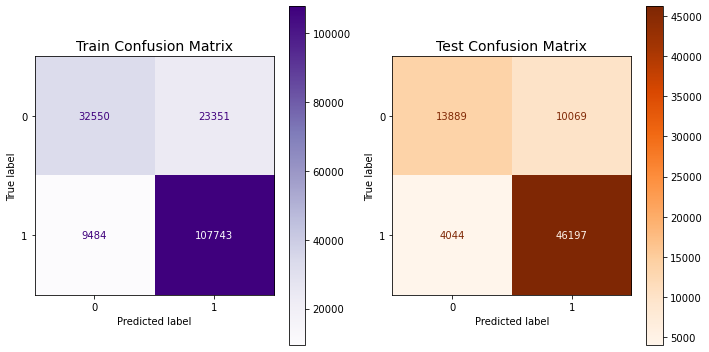

In [9]:
# Building modeling criteria
features = vet_1[vet_1[veteran_e].drop(['HINS6_2', 'MLPA_0', 'MLPA_1', 'MLPB_1', 'MLPB_0','VPS_1', 'VPS_2', 
                                        'VPS_3', 'VPS_4', 'VPS_5', 'VPS_6', 'VPS_7', 'VPS_8', 'VPS_9', 'VPS_10', 
                                        'VPS_11', 'VPS_12', 'VPS_13', 'VPS_14', 'VPS_15', 'MLPE_0', 'MLPE_1',
                                        'MLPFG_0', 'MLPFG_1', 'MLPH_0', 'MLPH_1', 'MLPI_0', 'MLPI_1', 'MLPJ_0', 
                                        'MLPK_0', 'ESR_5', 'MLPJ_1', 'MLPK_1', 'ESR_2', 'ESR_3'], axis=1).columns]

# Split and Scale
y_train, y_test, X_train_sc, X_test_sc = split_scaler(features, vet_1['HINS6_2'])

# Logitistice Regression (scaled)
var_coef_vet = classifier(LogisticRegression(), y_train, y_test, X_train_sc, X_test_sc)

In [10]:
# Checking coeffiecients with Stats Models
model = sm.Logit(y_train, X_train_sc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.501056
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                HINS6_2   No. Observations:               173128
Model:                          Logit   Df Residuals:                   173117
Method:                           MLE   Df Model:                           10
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.2034
Time:                        16:33:04   Log-Likelihood:                -86747.
converged:                       True   LL-Null:                   -1.0890e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DRAT          -0.4336      0.026    -16.900      0.000      -0.484      -0.383
DRATX_2        0.5184      0.025     20.506      0.000       0.469       0.568
MIL           -0.6908      0.068    -10.172      0.000      -0.824      -0.558
MLPCD_0       -1.3679      0.081    -16.921      0.000      -1.526      -1.209
MLPCD_1       -1.1398      0.069    -16.405      0.000      -1.276      -1.004
ESR_1          0.2318      0.006     37.592      0.000       0.220       0.244
ESR_4          0.0874      0.032      2.772      0.006       0.026       0.149
FHINS5C       -0.3833      0.007    -52.587      0.000      -0.398      -0.369
FHINS5P       -1.8493      0.017   -107.609      0.000      -1.883      -1.816
FHINS6P        1.3223      0.015     85.382      0.000       1.292       1.353
FMILSP         0.0840      0.006     14.073      0.000       0.072       0.096
==============================================================================
"""

### Classify VA enrollment based on Health and Wellness Features
---


 Training Score :  0.768795342174576
 Test Score :      0.7687704686046982


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.74      0.44      0.55     23958
           1       0.78      0.92      0.84     50241

    accuracy                           0.77     74199
   macro avg       0.76      0.68      0.70     74199
weighted avg       0.76      0.77      0.75     74199




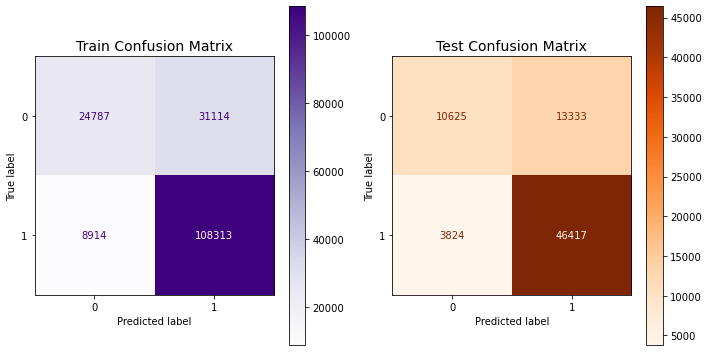

In [11]:
# Building modeling criteria
features = vet_1[vet_1[health_e].drop(['HINS6_2'], axis=1).columns]

# Split and Scale
y_train1, y_test1, X_train_sc1, X_test_sc1 = split_scaler(features, vet_1['HINS6_2'])

# Logitistice Regression (scaled)
var_coef_health = classifier(LogisticRegression(), y_train1, y_test1, X_train_sc1, X_test_sc1)

In [12]:
# Checking coeffiecients with Stats Models
model = sm.Logit(y_train1, X_train_sc1, missing='drop').fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.583479
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                HINS6_2   No. Observations:               173128
Model:                          Logit   Df Residuals:                   173114
Method:                           MLE   Df Model:                           13
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                 0.07241
Time:                        16:33:06   Log-Likelihood:            -1.0102e+05
converged:                       True   LL-Null:                   -1.0890e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DDRS          -0.0172      0.007     -2.368      0.018      -0.032      -0.003
DEAR_2         0.0257      0.008      3.235      0.001       0.010       0.041
DEYE           0.0023      0.006      0.400      0.689      -0.009       0.014
DOUT_2        -0.0419      0.008     -5.363      0.000      -0.057      -0.027
DPHY_2         0.0366      0.008      4.312      0.000       0.020       0.053
DRAT          -1.0003      0.007   -142.798      0.000      -1.014      -0.987
DREM_2         0.0344      0.007      5.096      0.000       0.021       0.048
HINS1_2       -0.0474      0.006     -7.985      0.000      -0.059      -0.036
HINS2_2        0.1022      0.006     18.330      0.000       0.091       0.113
HINS3_2        0.2087      0.006     33.281      0.000       0.196       0.221
HINS4_2        0.0792      0.006     14.385      0.000       0.068       0.090
HINS5_2        0.0983      0.006     16.867      0.000       0.087       0.110
DIS            0.1502      0.011     13.769      0.000       0.129       0.172
HICOV_2        0.1797      0.007     24.809      0.000       0.166       0.194
==============================================================================
"""

### Classify VA enrollment based on Work and Income Features
---


 Training Score :  0.7018910863638465
 Test Score :      0.7027992291001226


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.69      0.14      0.24     23958
           1       0.70      0.97      0.82     50241

    accuracy                           0.70     74199
   macro avg       0.70      0.56      0.53     74199
weighted avg       0.70      0.70      0.63     74199




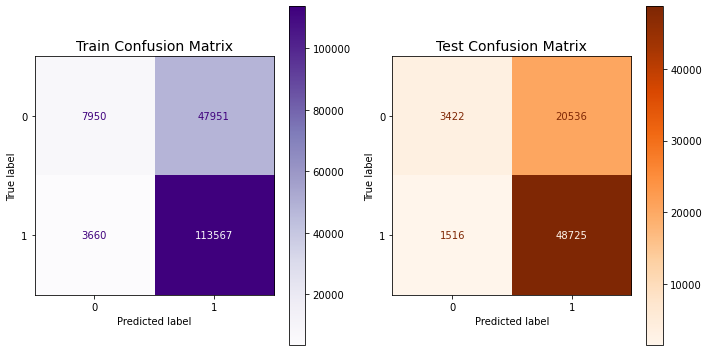

In [13]:
# Building modeling criteria
features = vet_1[vet_1[work_income_e].drop(['COW_1', 'COW_2', 'COW_3', 'COW_4', 'COW_5', 'COW_6', 'COW_7', 
                                            'COW_8', 'COW_9', 'WKW_1', 'WKW_2', 'WKW_3', 'WKW_4', 'WKW_5', 
                                            'WKW_6', 'WKL', 'PERNP_adj', 'PAP_adj', 'RETP_adj', 'SEMP_adj',
                                            'SSIP_adj', 'SSP_adj', 'WAGP_adj'], axis=1).columns]

# Split and Scale
y_train2, y_test2, X_train_sc2, X_test_sc2 = split_scaler(features, vet_1['HINS6_2'])

# Logitistice Regression (scaled)
var_coef_work = classifier(LogisticRegression(), y_train2, y_test2, X_train_sc2, X_test_sc2)

In [14]:
# Checking coeffiecients with Stats Models
model = sm.Logit(y_train2, X_train_sc2, missing='drop').fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.651696
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                HINS6_2   No. Observations:               173128
Model:                          Logit   Df Residuals:                   173114
Method:                           MLE   Df Model:                           13
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                -0.03604
Time:                        16:33:08   Log-Likelihood:            -1.1283e+05
converged:                       True   LL-Null:                   -1.0890e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
INTP_adj       0.0230      0.006      3.694      0.000       0.011       0.035
OIP_adj       -0.6008      0.008    -72.280      0.000      -0.617      -0.584
NWLK_1        -0.0313      0.008     -4.084      0.000      -0.046      -0.016
NWLK_2        -0.0332      0.010     -3.251      0.001      -0.053      -0.013
WKHP           0.0548      0.013      4.288      0.000       0.030       0.080
WRK_1          0.0548      0.014      3.949      0.000       0.028       0.082
WRK_2         -0.2033      0.013    -15.232      0.000      -0.229      -0.177
PINCP_adj      0.0816      0.007     11.263      0.000       0.067       0.096
POVPIP         0.1331      0.006     21.550      0.000       0.121       0.145
ESR_1         -0.1486      0.019     -7.701      0.000      -0.186      -0.111
ESR_2         -0.0289      0.005     -5.254      0.000      -0.040      -0.018
ESR_3          0.0197      0.008      2.494      0.013       0.004       0.035
ESR_4          0.1803      0.010     18.564      0.000       0.161       0.199
ESR_5          0.0215      0.006      3.900      0.000       0.011       0.032
==============================================================================
"""

### Classify VA enrollment based on Ethnicity Features
---


 Training Score :  0.6771117323598724
 Test Score :      0.6771115513686168


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23958
           1       0.68      1.00      0.81     50241

    accuracy                           0.68     74199
   macro avg       0.34      0.50      0.40     74199
weighted avg       0.46      0.68      0.55     74199




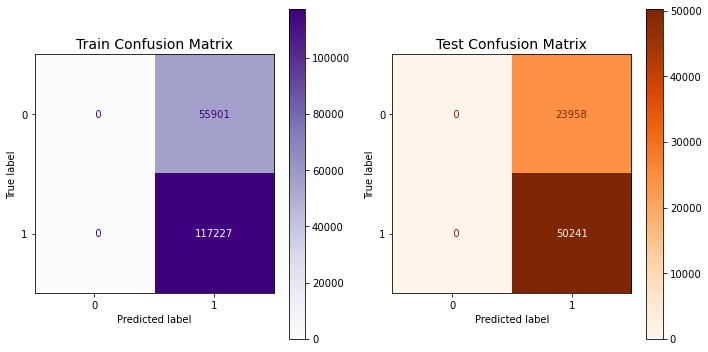

In [15]:
# Building modeling criteria
features = vet_1[vet_1[ethnicity_e].drop([], axis=1).columns]

# Split and Scale
y_train3, y_test3, X_train_sc3, X_test_sc3 = split_scaler(features, vet_1['HINS6_2'])

# Logitistice Regression (scaled)
var_coef_work = classifier(LogisticRegression(), y_train3, y_test3, X_train_sc3, X_test_sc3)

In [16]:
# Checking coeffiecients with Stats Models
model = sm.Logit(y_train3, X_train_sc3, missing='drop').fit()
model.summary()

         Current function value: 0.692154
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                HINS6_2   No. Observations:               173128
Model:                          Logit   Df Residuals:                   173110
Method:                           MLE   Df Model:                           17
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                 -0.1004
Time:                        16:33:10   Log-Likelihood:            -1.1983e+05
converged:                      False   LL-Null:                   -1.0890e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CIT_2         -0.0068      0.005     -1.337      0.181      -0.017       0.003
CIT_3          0.0089      0.005      1.839      0.066      -0.001       0.018
CIT_4          0.0175      0.006      3.174      0.002       0.007       0.028
CIT_5          0.0188      0.005      3.661      0.000       0.009       0.029
ENG_1         -0.0143   1.22e+05  -1.17e-07      1.000   -2.39e+05    2.39e+05
ENG_2          0.0042   5.49e+04   7.62e-08      1.000   -1.08e+05    1.08e+05
ENG_3          0.0035   3.32e+04   1.07e-07      1.000   -6.51e+04    6.51e+04
ENG_4          0.0053   1.62e+04   3.27e-07      1.000   -3.17e+04    3.17e+04
HISP          -0.0022      0.006     -0.365      0.715      -0.014       0.010
RAC1P          0.0051      0.016      0.312      0.755      -0.027       0.037
RACAIAN       -0.0352      0.017     -2.083      0.037      -0.068      -0.002
RACASN         0.0171      0.019      0.910      0.363      -0.020       0.054
RACBLK        -0.0976      0.037     -2.605      0.009      -0.171      -0.024
RACNH         -0.0004      0.007     -0.057      0.955      -0.015       0.014
RACNUM         0.0072      0.023      0.309      0.757      -0.039       0.053
RACSOR        -0.0023      0.015     -0.150      0.881      -0.032       0.028
RACWHT        -0.0363      0.044     -0.830      0.407      -0.122       0.049
FCITP          0.0122      0.005      2.494      0.013       0.003       0.022
LANX           0.0095   1.37e+05   6.95e-08      1.000   -2.68e+05    2.68e+05
==============================================================================
"""

### Classify VA enrollment based on Lifestyle Features
---


 Training Score :  0.6771117323598724
 Test Score :      0.6771115513686168


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23958
           1       0.68      1.00      0.81     50241

    accuracy                           0.68     74199
   macro avg       0.34      0.50      0.40     74199
weighted avg       0.46      0.68      0.55     74199




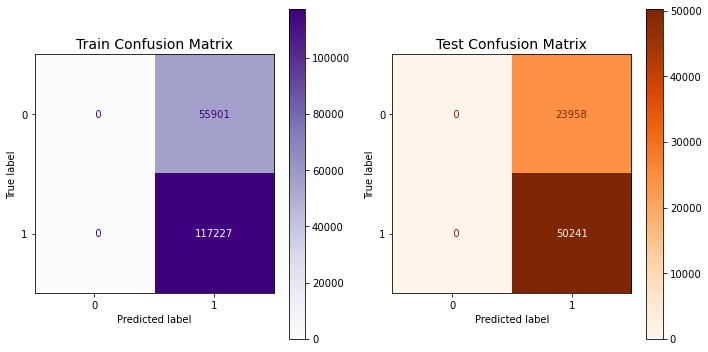

In [17]:
# Building modeling criteria
features = vet_1[vet_1[ethnicity_e].drop([], axis=1).columns]

# Split and Scale
y_train4, y_test4, X_train_sc4, X_test_sc4 = split_scaler(features, vet_1['HINS6_2'])

# Logitistice Regression (scaled)
var_coef_work = classifier(LogisticRegression(), y_train4, y_test4, X_train_sc4, X_test_sc4)

In [18]:
# Checking coeffiecients with Stats Models
model = sm.Logit(y_train4, X_train_sc4, missing='drop').fit()
model.summary()

         Current function value: 0.692154
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                HINS6_2   No. Observations:               173128
Model:                          Logit   Df Residuals:                   173110
Method:                           MLE   Df Model:                           17
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                 -0.1004
Time:                        16:33:13   Log-Likelihood:            -1.1983e+05
converged:                      False   LL-Null:                   -1.0890e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CIT_2         -0.0068      0.005     -1.337      0.181      -0.017       0.003
CIT_3          0.0089      0.005      1.839      0.066      -0.001       0.018
CIT_4          0.0175      0.006      3.174      0.002       0.007       0.028
CIT_5          0.0188      0.005      3.661      0.000       0.009       0.029
ENG_1         -0.0143   1.22e+05  -1.17e-07      1.000   -2.39e+05    2.39e+05
ENG_2          0.0042   5.49e+04   7.62e-08      1.000   -1.08e+05    1.08e+05
ENG_3          0.0035   3.32e+04   1.07e-07      1.000   -6.51e+04    6.51e+04
ENG_4          0.0053   1.62e+04   3.27e-07      1.000   -3.17e+04    3.17e+04
HISP          -0.0022      0.006     -0.365      0.715      -0.014       0.010
RAC1P          0.0051      0.016      0.312      0.755      -0.027       0.037
RACAIAN       -0.0352      0.017     -2.083      0.037      -0.068      -0.002
RACASN         0.0171      0.019      0.910      0.363      -0.020       0.054
RACBLK        -0.0976      0.037     -2.605      0.009      -0.171      -0.024
RACNH         -0.0004      0.007     -0.057      0.955      -0.015       0.014
RACNUM         0.0072      0.023      0.309      0.757      -0.039       0.053
RACSOR        -0.0023      0.015     -0.150      0.881      -0.032       0.028
RACWHT        -0.0363      0.044     -0.830      0.407      -0.122       0.049
FCITP          0.0122      0.005      2.494      0.013       0.003       0.022
LANX           0.0095   1.37e+05   6.95e-08      1.000   -2.68e+05    2.68e+05
==============================================================================
"""

### Classify VA enrollment based on Location Features
---


 Training Score :  0.6771117323598724
 Test Score :      0.6771115513686168


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23958
           1       0.68      1.00      0.81     50241

    accuracy                           0.68     74199
   macro avg       0.34      0.50      0.40     74199
weighted avg       0.46      0.68      0.55     74199




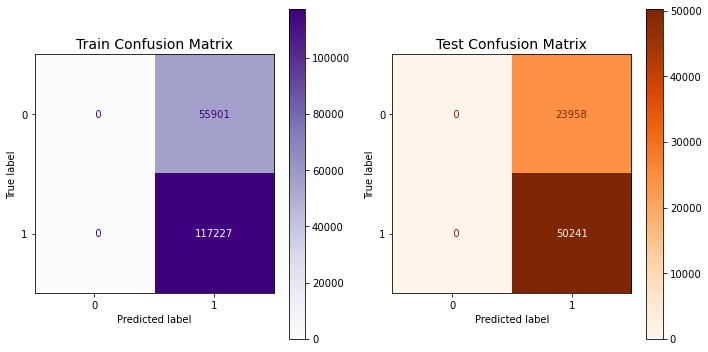

In [19]:
# Building modeling criteria
features = vet_1[vet_1[location_e].drop([], axis=1).columns]

# Split and Scale
y_train5, y_test5, X_train_sc5, X_test_sc5 = split_scaler(features, vet_1['HINS6_2'])

# Logitistice Regression (scaled)
var_coef_work = classifier(LogisticRegression(), y_train5, y_test5, X_train_sc5, X_test_sc5)

In [20]:
# Checking coeffiecients with Stats Models
model = sm.Logit(y_train5, X_train_sc5, missing='drop').fit()
model.summary()

         Current function value: 0.691820
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                HINS6_2   No. Observations:               173128
Model:                          Logit   Df Residuals:                   173118
Method:                           MLE   Df Model:                            9
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                -0.09983
Time:                        16:33:15   Log-Likelihood:            -1.1977e+05
converged:                      False   LL-Null:                   -1.0890e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DIVISION_2     0.0134      0.008      1.579      0.114      -0.003       0.030
DIVISION_3    -0.0156   7.79e+04     -2e-07      1.000   -1.53e+05    1.53e+05
DIVISION_4    -0.0426   5.93e+04  -7.18e-07      1.000   -1.16e+05    1.16e+05
DIVISION_5    -0.0190   1.12e+05  -1.69e-07      1.000    -2.2e+05     2.2e+05
DIVISION_6    -0.0073   6.59e+04  -1.11e-07      1.000   -1.29e+05    1.29e+05
DIVISION_7    -0.0341   8.52e+04  -4.01e-07      1.000   -1.67e+05    1.67e+05
DIVISION_8    -0.0349   1.03e+05   -3.4e-07      1.000   -2.01e+05    2.01e+05
DIVISION_9    -0.0031   1.28e+05  -2.44e-08      1.000   -2.51e+05    2.51e+05
REGION_2      -0.0405   9.24e+04  -4.38e-07      1.000   -1.81e+05    1.81e+05
REGION_3      -0.0423   1.31e+05  -3.24e-07      1.000   -2.56e+05    2.56e+05
REGION_4      -0.0259   1.54e+05  -1.68e-07      1.000   -3.02e+05    3.02e+05
ST            -0.0174      0.006     -3.081      0.002      -0.029      -0.006
PUMA           0.0702      0.006     12.665      0.000       0.059       0.081
==============================================================================
"""

### Classify VA enrollment based on General Demographic Features
---


 Training Score :  0.6765630054064045
 Test Score :      0.6764376878394588


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.38      0.00      0.01     23958
           1       0.68      1.00      0.81     50241

    accuracy                           0.68     74199
   macro avg       0.53      0.50      0.41     74199
weighted avg       0.58      0.68      0.55     74199




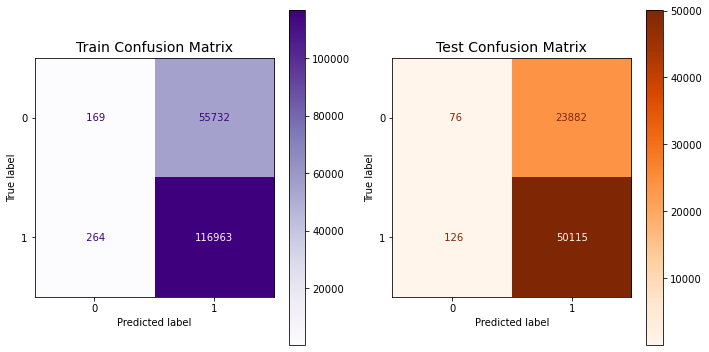

In [21]:
# Building modeling criteria
features = vet_1[vet_1[general_e].drop([], axis=1).columns]

# Split and Scale
y_train6, y_test6, X_train_sc6, X_test_sc6 = split_scaler(features, vet_1['HINS6_2'])

# Logitistice Regression (scaled)
var_coef_work = classifier(LogisticRegression(), y_train6, y_test6, X_train_sc6, X_test_sc6)

In [22]:
# Checking coeffiecients with Stats Models
model = sm.Logit(y_train6, X_train_sc6, missing='drop').fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.685541
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                HINS6_2   No. Observations:               173128
Model:                          Logit   Df Residuals:                   173122
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                -0.08984
Time:                        16:33:17   Log-Likelihood:            -1.1869e+05
converged:                       True   LL-Null:                   -1.0890e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGEP          -0.1951      0.005    -35.658      0.000      -0.206      -0.184
MAR_1          0.0608      0.008      7.546      0.000       0.045       0.077
MAR_2          0.0065      0.007      0.974      0.330      -0.007       0.020
MAR_3         -0.1197      0.007    -16.921      0.000      -0.134      -0.106
MAR_4         -0.0356      0.005     -6.857      0.000      -0.046      -0.025
SEX_2          0.0231      0.005      4.648      0.000       0.013       0.033
==============================================================================
"""

### Classify VA enrollment based on Education Features
---


 Training Score :  0.6771117323598724
 Test Score :      0.6771115513686168


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23958
           1       0.68      1.00      0.81     50241

    accuracy                           0.68     74199
   macro avg       0.34      0.50      0.40     74199
weighted avg       0.46      0.68      0.55     74199




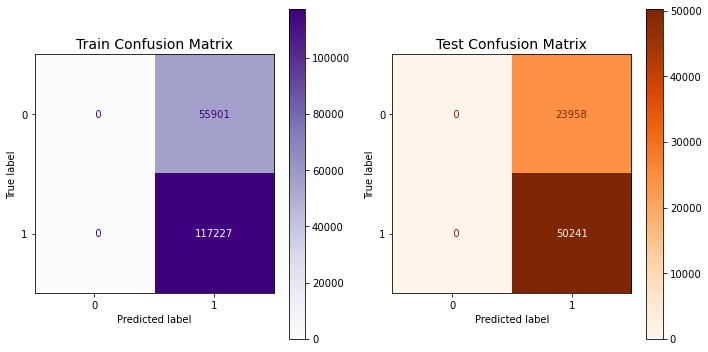

In [28]:
# Building modeling criteria
features = vet_1[vet_1[education_e].drop([], axis=1).columns]

# Split and Scale
y_train7, y_test7, X_train_sc7, X_test_sc7 = split_scaler(features, vet_1['HINS6_2'])

# Logitistice Regression (scaled)
var_coef_work = classifier(LogisticRegression(), y_train7, y_test7, X_train_sc7, X_test_sc7)

In [29]:
# Checking coeffiecients with Stats Models
model = sm.Logit(y_train7, X_train_sc7, missing='drop').fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.690889
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                HINS6_2   No. Observations:               173128
Model:                          Logit   Df Residuals:                   173109
Method:                           MLE   Df Model:                           18
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                -0.09834
Time:                        16:34:44   Log-Likelihood:            -1.1961e+05
converged:                       True   LL-Null:                   -1.0890e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
SCHL_8         0.0062      0.005      1.229      0.219      -0.004       0.016
SCHL_9         0.0026      0.005      0.476      0.634      -0.008       0.013
SCHL_10        0.0025      0.005      0.473      0.636      -0.008       0.013
SCHL_11       -0.0311      0.007     -4.592      0.000      -0.044      -0.018
SCHL_12       -0.0175      0.007     -2.660      0.008      -0.030      -0.005
SCHL_13       -0.0170      0.007     -2.335      0.020      -0.031      -0.003
SCHL_14       -0.0110      0.007     -1.494      0.135      -0.025       0.003
SCHL_15       -0.0126      0.008     -1.655      0.098      -0.028       0.002
SCHL_16       -0.0179      0.024     -0.735      0.462      -0.065       0.030
SCHL_17       -0.0846      0.013     -6.477      0.000      -0.110      -0.059
SCHL_18       -0.0488      0.017     -2.909      0.004      -0.082      -0.016
SCHL_19       -0.0655      0.022     -3.002      0.003      -0.108      -0.023
SCHL_20       -0.0672      0.018     -3.830      0.000      -0.102      -0.033
SCHL_21       -6.2040      1.536     -4.039      0.000      -9.215      -3.193
SCHL_22       -4.5618      1.128     -4.044      0.000      -6.773      -2.351
SCHL_23       -2.4959      0.627     -3.981      0.000      -3.725      -1.267
SCHL_24       -1.8364      0.458     -4.011      0.000      -2.734      -0.939
SCIENGP        5.8650      0.847      6.922      0.000       4.204       7.526
SCIENGRLP      1.6258      1.472      1.105      0.269      -1.259       4.510
==============================================================================
"""